In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
#open foto
cat4 = cv2.imread(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\train\CAT\4.jpg')
#convert to RGB
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

In [3]:
type(cat4)

numpy.ndarray

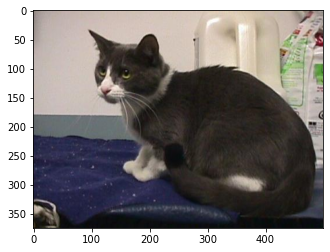

In [4]:
plt.imshow(cat4)

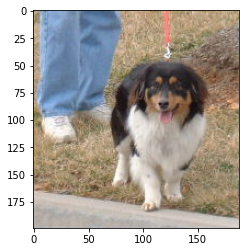

In [5]:
dog2 = cv2.imread(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\train\DOG\2.jpg')
#convert to RGB
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)
#show
plt.imshow(dog2)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

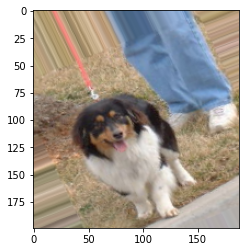

In [7]:
#Generate batches of tensor image data with real-time data augmentation.

image_gen = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1/255)
#show generated image
plt.imshow(image_gen.random_transform(dog2))

In [9]:
#Takes the path to a directory & generates batches of augmented data.
image_gen.flow_from_directory(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\train')

Found 18743 images belonging to 2 classes.


In [10]:
image_gen.flow_from_directory(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\test')

Found 6251 images belonging to 2 classes.


In [12]:
image_shape=(150,150,3)

In [11]:
### Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [13]:
#build sequential model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#model kompilieren
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
#model visualisation
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
batch_size = 16

In [16]:
train_image_gen = image_gen.flow_from_directory(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\train', target_size=image_shape[:2],batch_size=batch_size, class_mode='binary')

Found 18743 images belonging to 2 classes.


In [17]:
test_image_gen = image_gen.flow_from_directory(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\test', target_size=image_shape[:2],batch_size=batch_size, class_mode='binary')

Found 6251 images belonging to 2 classes.


In [18]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [20]:
#train the model
results = model.fit(train_image_gen, epochs=10,#100 
                              steps_per_epoch=5, #150
                             validation_data= test_image_gen,
                             validation_steps=12)

Epoch 1/10
5/5 [==============================] - 4s 829ms/step - loss: 0.6914 - accuracy: 0.5750 - val_loss: 0.6933 - val_accuracy: 0.4635
Epoch 2/10
5/5 [==============================] - 3s 653ms/step - loss: 0.6942 - accuracy: 0.5500 - val_loss: 0.6918 - val_accuracy: 0.4948
Epoch 3/10
5/5 [==============================] - 4s 765ms/step - loss: 0.6934 - accuracy: 0.5125 - val_loss: 0.6921 - val_accuracy: 0.5156
Epoch 4/10
5/5 [==============================] - 3s 626ms/step - loss: 0.6956 - accuracy: 0.3750 - val_loss: 0.6934 - val_accuracy: 0.4688
Epoch 5/10
5/5 [==============================] - 3s 711ms/step - loss: 0.6919 - accuracy: 0.5375 - val_loss: 0.6926 - val_accuracy: 0.5260
Epoch 6/10
5/5 [==============================] - 3s 727ms/step - loss: 0.6937 - accuracy: 0.5250 - val_loss: 0.6915 - val_accuracy: 0.5573
Epoch 7/10
5/5 [==============================] - 3s 669ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.6302
Epoch 8/10
5/5 [====

In [22]:
#evaluate model
results.history['accuracy']

[0.574999988079071,
 0.550000011920929,
 0.512499988079071,
 0.375,
 0.5375000238418579,
 0.5249999761581421,
 0.5,
 0.5,
 0.512499988079071,
 0.625]

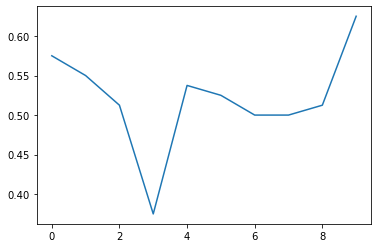

In [23]:
plt.plot(results.history['accuracy'])

In [25]:
#save model
model.save('cat_dog_model.h5')

In [26]:
#Prediction
from keras.models import load_model

new_model = load_model(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\07-Deep-Learning-maschinelles-Sehen\cat_dog_100epochs.h5')

In [27]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [28]:
from keras.preprocessing import image

In [31]:
#Fahrt
dog_file= r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\CATS_DOGS\test\DOG\9477.jpg'
#open img
dog_img = image.load_img(dog_file, target_size=(150,150))
#convert into array
dog_img = image.img_to_array(dog_img)

In [32]:
import numpy as np

dog_img = np.expand_dims(dog_img, axis=0)
#scale
dog_img = dog_img/255

In [34]:
#predicton
np.argmax(new_model.predict(dog_img), axis=-1)

array([0], dtype=int64)

In [35]:
new_model.predict(dog_img)

array([[0.9995546]], dtype=float32)